## Import

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import joblib

## Dataset

In [21]:
data = pd.read_csv("../data/loan.csv")

In [22]:
data = data.drop(['Loan_ID'], axis=1)

In [23]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Preprocessing

In [24]:
print("Summary of Dataset :")
print(data.describe())

Summary of Dataset :
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [25]:
print("Missing values :")
print(data.isnull().sum())

Missing values :
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [26]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
vars_categ = data.select_dtypes(include=['object']).columns
print(vars_categ)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


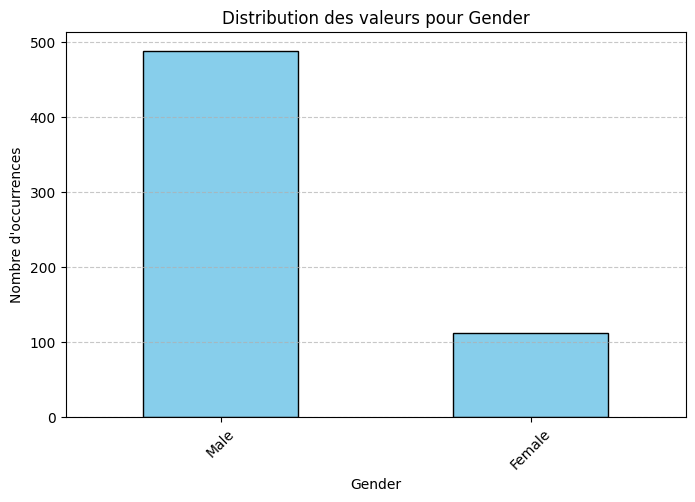

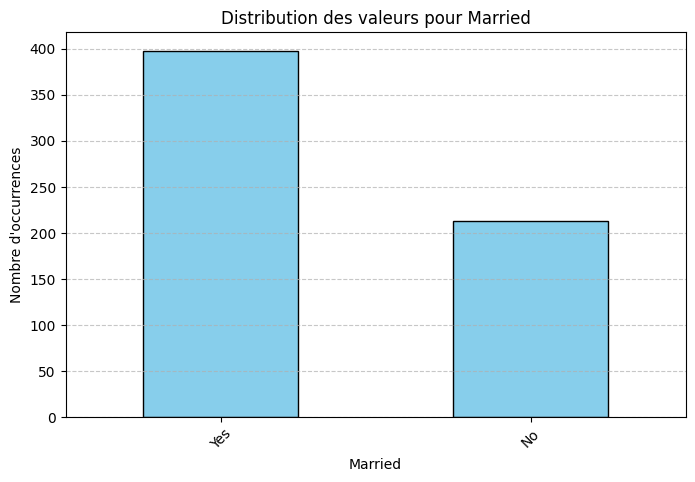

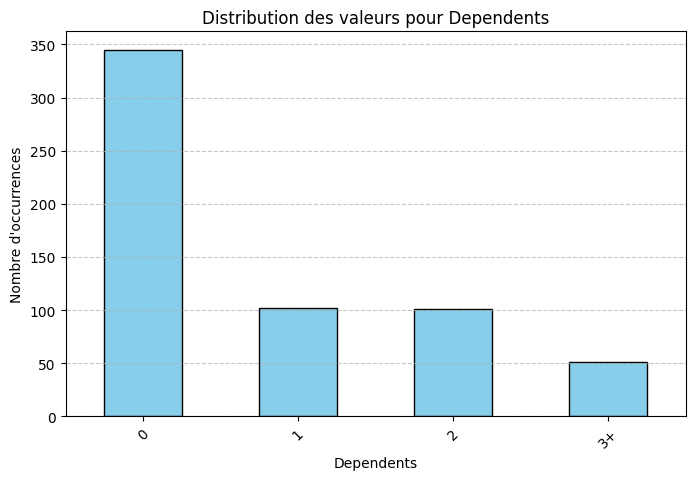

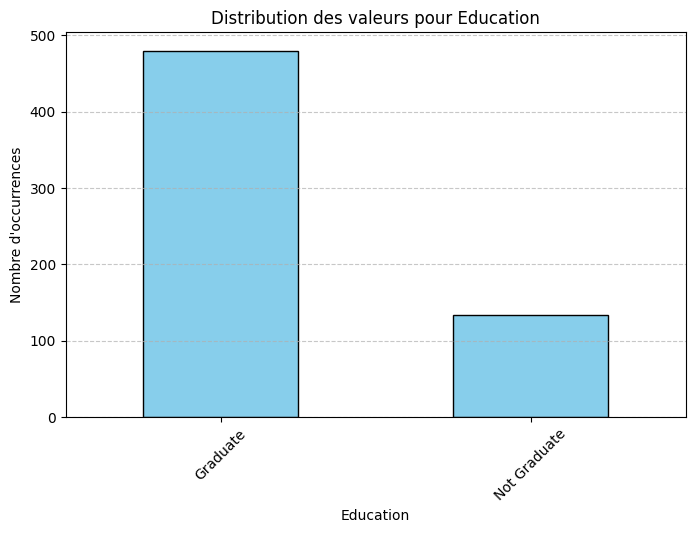

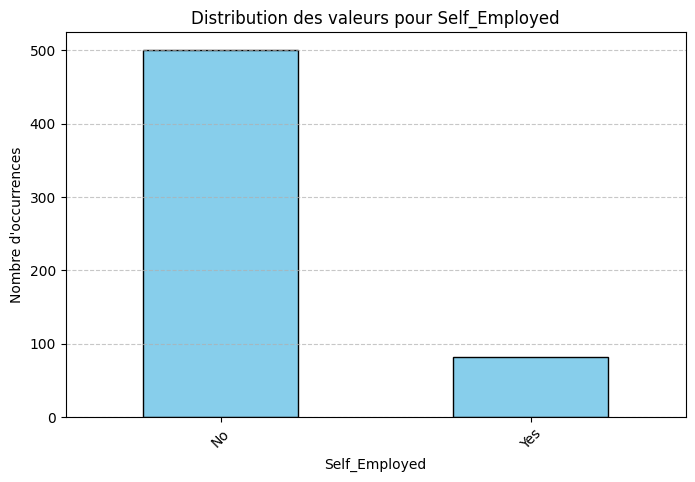

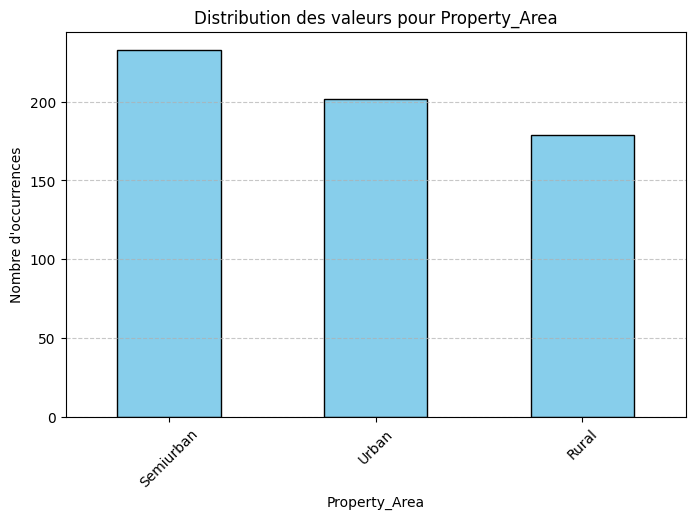

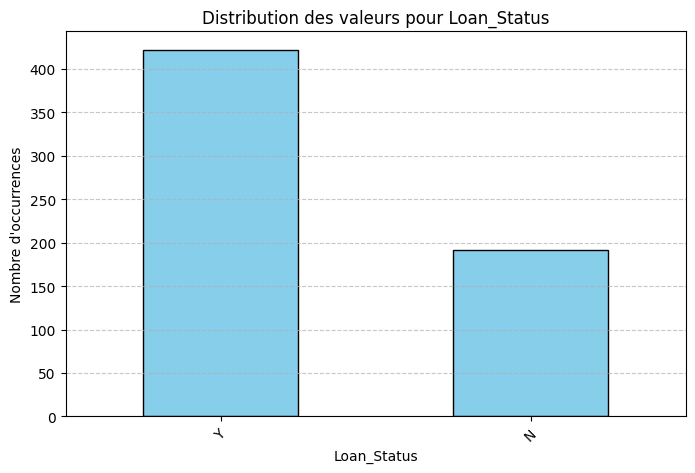

In [28]:
# Générer un bar plot pour chaque colonne catégorielle
for col in vars_categ:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Distribution des valeurs pour {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [29]:
label_encoder = LabelEncoder()

data_cat = (data.dtypes == 'object')
for col in list(data_cat[data_cat].index):
    data[col] = label_encoder.fit_transform(data[col])

In [30]:
test = (data.dtypes == 'object')
print(test)

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool


In [31]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

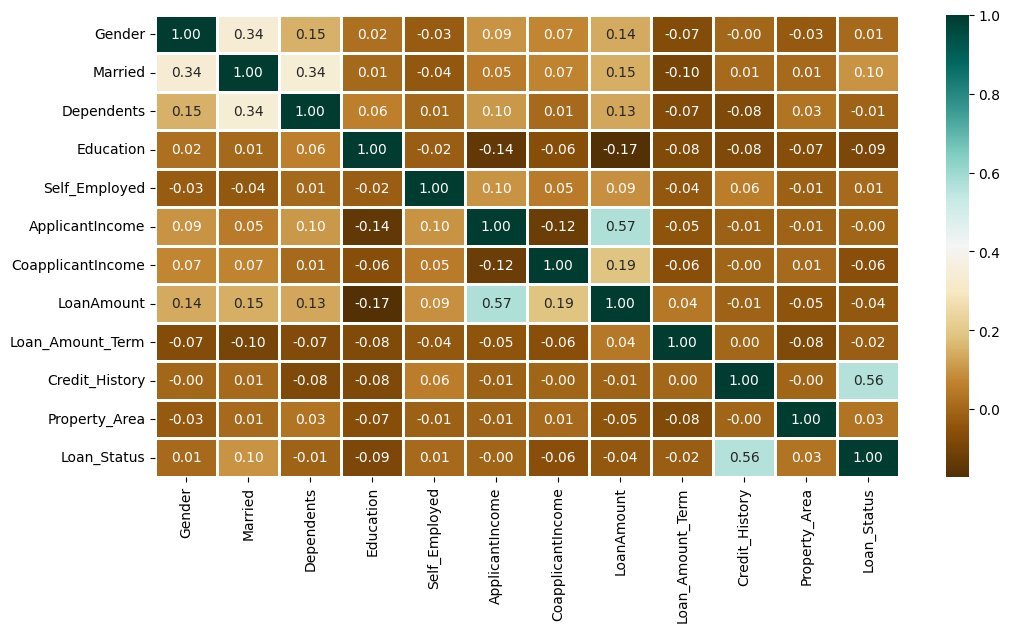

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [33]:
print("Missing values :")
print(data.isnull().sum())

Missing values :
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [34]:
# Remplacer les valeurs nulles par la moyenne des colonnes numériques
data.fillna(data.mean(), inplace=True)

## Training

In [35]:
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Training set shape : {X_train.shape}")
print(f"Y train set shape : {y_train.shape}")
print(f"Test set shape : {X_test.shape}")
print(f"Y Test set shape : {y_test.shape}")

Training set shape : (368, 11)
Y train set shape : (368,)
Test set shape : (246, 11)
Y Test set shape : (246,)


In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [38]:
from sklearn.model_selection import GridSearchCV

# Définir les modèles avec leurs grilles de paramètres
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 0.5, 1, 2, 5, 10], 
        'solver': ['liblinear', 'lbfgs']
    },
    "SVC": {
        'C': [0.1, 0.5, 1, 2, 5, 10], 
        'kernel': ['linear', 'rbf']
    },
    "Random Forest Classifier": {
        'n_estimators': [30, 50, 75, 100, 200], 
        'max_depth': [1, 2, 3, 4, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 10], 
        'metric': ['euclidean', 'manhattan']
    }
}

best_models = {}

for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_}\n")

# Évaluation sur le test set
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Test Accuracy: {accuracy}\n")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best accuracy: 0.817993335801555

Optimizing SVC...
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best accuracy: 0.817993335801555

Optimizing Random Forest Classifier...
Best parameters for Random Forest Classifier: {'max_depth': 3, 'n_estimators': 50}
Best accuracy: 0.817993335801555

Optimizing K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 7}
Best accuracy: 0.8017030729359498

Logistic Regression Test Accuracy: 0.7967479674796748

SVC Test Accuracy: 0.7967479674796748

Random Forest Classifier Test Accuracy: 0.7967479674796748

K-Nearest Neighbors Test Accuracy: 0.7886178861788617



In [39]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear'),
 'SVC': SVC(C=0.1, kernel='linear'),
 'Random Forest Classifier': RandomForestClassifier(max_depth=3, n_estimators=50),
 'K-Nearest Neighbors': KNeighborsClassifier(metric='euclidean', n_neighbors=7)}

In [40]:
model = RandomForestClassifier(max_depth=2, n_estimators=75)
model = model.fit(X_train_scaled, y_train)

## Save

In [41]:
joblib.dump(model, 'model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved")

Model and scaler saved
